# **CAVIAR Network Analysis**

In this case study, we will go through and understand a **time-varying criminal network that was repeatedly disrupted by police forces**, and how the criminal network reoriented in response to the seizures of product by the police forces.

--------------------
## **Context**
--------------------
Here is some information on the CAVIAR project and the role of certain individuals arrested following the investigation. **The investigation lasted two years and ran from 1994 to 1996**. The operation was brought together by investigation units of the **Montreal police and the Royal Canadian Mounted Police of Canada**. **During these two years, 11 wiretap warrants, valid for about two months each, were obtained (11 matrices match these phases).**

This case is rather unique because, unlike other investigative strategies, **the mandate of the CAVIAR project was to seize the drugs without arresting criminals**. During this period, imports of the trafficking network were hit and seized by the police on eleven occasions. **The arrests took place only at the end of the investigation**. Monetary losses for traffickers were estimated at 32 million dollars. **Some phases included no seizures, and others included multiple**. Here is what they represent **in terms of the amount of money**: 

- Phase 4 - 1 seizure, 2,500,000 Dollars, 300 kg of marijuana
- Phase 6 - 3 seizures, 1,300,000 Dollars, 2 x 15 kg of marijuana + 1 x 2 kg of cocaine
- Phase 7 - 1 seizure, 3,500,000 Dollars, 401 kg of marijuana
- Phase 8 - 1 seizure, 360,000 Dollars, 9 kg of cocaine
- Phase 9 - 2 seizures, 4,300,000 Dollars, 2 kg of cocaine + 1 x 500 kg marijuana
- Phase 10 - 1 seizure, 18,700,000 Dollars, 2200 kg of marijuana
- Phase 11 - 2 seizures, 1,300,000 Dollars, 12 kg of cocaine + 11 kg of cocaine

As you can see, this case study offers a **rare opportunity to study a criminal network in response to upheaval by police forces**. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints. 

------------------------------------
## **About the network**
------------------------------------
The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors, accountants, owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montreal, attempting to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States. 

According to the police, the role of the players of the "Serero organization" under investigation were the following: 

- Daniel Serero (N1) - Mastermind of the network
- Pierre Perlini (N3) - Principal lieutenant of Serero, executes instructions
- Alain (N83) and G'erard (N86) Levy - Investors and transporters of money
- Wallace Lee (N85) - Takes care of financial affairs (accountant)
- Gaspard Lino (N6) - Broker in Spain
- Samir Rabbat (N11) - Provider in Morocco
- Lee Gilbert (N88) - Trusted man of Wallace Lee (became an informer after the arrest)
- Beverly Ashton (N106) - Spouse of Lino, transports money and documents
- Antonio Iannacci (N89) - Investor
- Mohammed Echouafni (N84) - Moroccan investor
- Richard Gleeson (N5), Bruno de Quinzio (N8), and Gabrielle Casale (N76) - Charged with recuperating the marijuana
- Roderik Janouska (N77) - Individual with airport contacts
- Patrick Lee (N87) - Investor
- Salvatore Panetta (N82) - Transport arrangements manager
- Steve Cunha (N96) - Transport manager, owner of a legitimate import company (became an informer after the arrest)
- Ernesto Morales (N12) - Principal organizer of the cocaine import, an intermediary between the Colombians and the Serero organization
- Oscar Nieri (N17) - The handyman of Morales
- Richard Brebner (N80) - Transporting the cocaine from the US to Montreal
- Ricardo Negrinotti (N33) - Taking possession of the cocaine in the US to hand it to Brebner
- Johnny Pacheco (N16) - Cocaine provider

-----------------------
## **Objective**
-----------------------
- The objective of the case study is to **understand, create, and visualize the data in phases**.
- Later on, we will **apply different network centrality measures** and understand the important nodes of the network.
- We will **visualize the centrality measures** of the important nodes across phases.

## **Importing the required libraries**

In [1]:
import networkx as nx
from decorator import decorator
from networkx.utils import create_random_state, create_py_random_state
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pprint import pprint

%matplotlib inline

# # To get rid of warning messages
# warnings.filterwarnings('ignore') 

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.4f}'.format  
pd.set_option('display.max_colwidth', None)

# Update default background style of plots
sns.set_style(style = 'darkgrid')

In [2]:
# Setting the subjects
subject = {
    1: "Daniel Serero (N1) - Mastermind of the network",
    3: "Pierre Perlini (N3) - Principal lieutenant of Serero, executes instructions",
    5: "Richard Gleeson (N5)",
    6: "Gaspard Lino (N6) - Broker in Spain",
    8: "Bruno de Quinzio (N8)",
    11: "Samir Rabbat (N11) - Provider in Morocco",
    12: "Ernesto Morales (N12) - Main Cocaine Importer, intermediary between Colombians and Serero",
    16: "Johnny Pacheco (N16) - Cocaine provider",
    17: "Oscar Nieri (N17) - The handyman of Morales",
    33: "Ricardo Negrinotti (N33) - Taking possession of the cocaine in the US to hand it to Brebner",
    76: "Gabrielle Casale (N76) - Charged with recuperating the marijuana",
    77: "Roderik Janouska (N77) - Individual with airport contacts",
    80: "Richard Brebner (N80) - Transporting the cocaine from the US to Montreal",
    82: "Salvatore Panetta (N82) - Transport arrangements manager",
    83: "Alain (N83)",
    84: "Mohammed Echouafni (N84) - Moroccan investor",
    85: "Wallace Lee (N85) - Takes care of financial affairs (accountant)",
    86: "G'erard (N86) Levy - Investors and transporters of money",
    87: "Patrick Lee (N87) - Investor",
    88: "Lee Gilbert (N88) - Trusted man of Wallace Lee (became an informer after the arrest)",
    89: "Antonio Iannacci (N89) - Investor",
    96: "Steve Cunha (N96) - Transport manager, Owner Import Company (Become Informer)",
    106: "Beverly Ashton (N106) - Spouse of Lino, transports money and documents",
}

## **Loading the data from 11 phases**

In [3]:
path = 'data/CAVIAR_Phases/'

P1 = pd.read_csv(path + "phase1.csv")
P2 = pd.read_csv(path + "phase2.csv")
P3 = pd.read_csv(path + "phase3.csv")
P4 = pd.read_csv(path + "phase4.csv")
P5 = pd.read_csv(path + "phase5.csv")
P6 = pd.read_csv(path + "phase6.csv")
P7 = pd.read_csv(path + "phase7.csv")
P8 = pd.read_csv(path + "phase8.csv")
P9 = pd.read_csv(path + "phase9.csv")
P10 = pd.read_csv(path + "phase10.csv")
P11 = pd.read_csv(path + "phase11.csv")

# Reviewing the shape of each df
phases = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]
for i, df in enumerate(phases):
    print(f'P{i+1}: {df.shape}')

P1: (15, 16)
P2: (24, 25)
P3: (33, 34)
P4: (33, 34)
P5: (32, 33)
P6: (26, 27)
P7: (36, 37)
P8: (42, 43)
P9: (34, 35)
P10: (42, 43)
P11: (41, 42)


In [4]:
P1.head()

,Unnamed: 0,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
0,1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3,83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0


So, we have the data in the form of an adjacency matrix represented through a DataFrame.

**Observations:**

- The first column (Unnamed: 0) needs to be set as the index.
- The column names and the indices should have the same data type.

Let us check the points above.

In [5]:
# Setting first column as the index to achieve the adjacency matrix for each phase
# Defining a list with the phases
phases = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]

# Now, let us set the first column as the index for all the DataFrames
for p in phases:
    p.set_index(p.columns[0], inplace = True)
    # p.sort_index(inplace=True)

In [6]:
# Now, that we have set the index, check for the consistency in column names and indices data type
P1.index, P1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Index(['1', '4', '89', '83', '3', '5', '88', '85', '90', '2', '7', '54', '6',
        '64', '8'],
       dtype='object'))

**Observation:**

- The above output shows that the indices are of integer data type and the column names are of object data type.
- Let's convert the column names to integer data types.

In [7]:
# Let's convert the column names to integer types
phases = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]

# col = []

# for p in phases:                 # Running the loop for each phase (11)
#     for i in p.columns:          # Running the loop for each column of each phase
#         col.append(int(i))       # Appending column names to the list 'col'
#     p.columns = col              # Updating the column names for each phase
#     col = []                     # Reinitiating the list 'col' as an empty list 

for p in phases:
    p.columns = p.columns.astype(int)

In [8]:
# Let's check if the transformation worked
P1.index, P1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64'))

In [9]:
# Confirming the consistency between index and columns
for p in phases:
    assert set(p.index) == set(p.columns)

**Observation:**

- We observe that the transformation has worked. Both, indices as well as column names, are of integer data type.  

## **Generating Graphs**

Now, that we have created the adjacency matrices, let us now try to create graphs out of these adjacency matrices.

- We will use the from_pandas_adjacency function and pass the adjacency matrix for each phase as a DataFrame.

In [10]:
graphs = []

for i, p in enumerate(phases):
    g = 'graph' + str(i + 1)     
    print(g)
    
    g = nx.from_pandas_adjacency(p)
    graphs.append(g)
    print(g.nodes())

graph1
[5, 83, 3, 90, 88, 85, 89, 4, 8, 64, 6, 54, 7, 2, 1]
graph2
[3, 85, 83, 90, 64, 6, 2, 7, 86, 88, 89, 12, 11, 9, 76, 98, 47, 97, 56, 10, 55, 8, 5, 1]
graph3
[5, 83, 88, 48, 89, 3, 7, 6, 52, 2, 90, 86, 85, 4, 12, 51, 13, 99, 50, 107, 49, 84, 32, 11, 35, 34, 9, 76, 56, 10, 55, 8, 1]
graph4
[5, 83, 88, 90, 85, 3, 76, 47, 6, 106, 8, 7, 86, 89, 4, 15, 52, 14, 12, 31, 109, 63, 51, 13, 107, 49, 84, 53, 11, 35, 9, 2, 1]
graph5
[5, 88, 83, 6, 86, 76, 89, 3, 32, 100, 34, 11, 8, 15, 55, 2, 85, 4, 19, 82, 25, 17, 18, 108, 12, 31, 13, 84, 9, 47, 7, 1]
graph6
[3, 8, 11, 13, 84, 12, 85, 82, 15, 83, 5, 19, 25, 31, 76, 2, 4, 20, 87, 77, 78, 18, 14, 9, 6, 1]
graph7
[3, 18, 83, 81, 2, 34, 9, 14, 88, 8, 55, 17, 5, 11, 69, 12, 77, 19, 85, 4, 15, 28, 75, 16, 68, 61, 79, 74, 22, 20, 87, 78, 76, 6, 62, 1]
graph8
[3, 8, 18, 59, 84, 80, 78, 35, 14, 39, 23, 73, 12, 17, 87, 34, 83, 85, 37, 33, 16, 19, 25, 11, 76, 2, 4, 36, 91, 38, 67, 81, 28, 22, 20, 77, 82, 13, 9, 6, 86, 1]
graph9
[3, 13, 17, 29, 30, 76, 8

## **Visualizing the Graphs**

Let us now visualize the graphs that we have created above.

### **Note:** In case you face an error while running the below code, please upgrade the decorator library, by running the following code, to resolve the error.

**!pip install --upgrade decorator**

****************************************************************************************
Graph for phase: 1


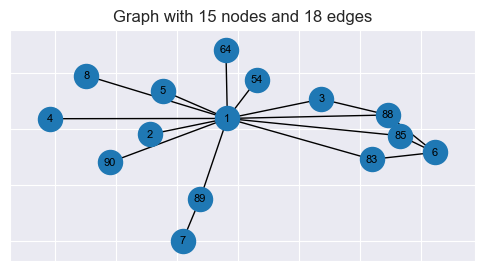

****************************************************************************************
Graph for phase: 2


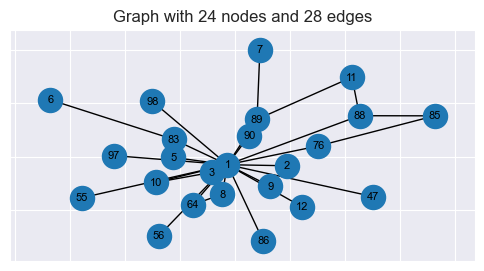

****************************************************************************************
Graph for phase: 3


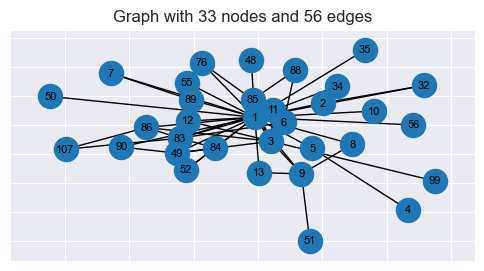

****************************************************************************************
Graph for phase: 4


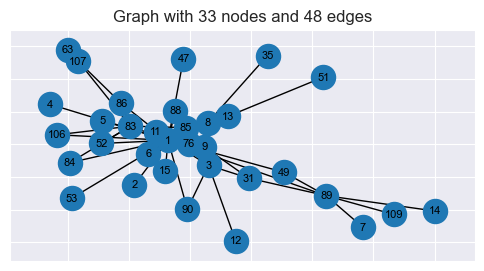

****************************************************************************************
Graph for phase: 5


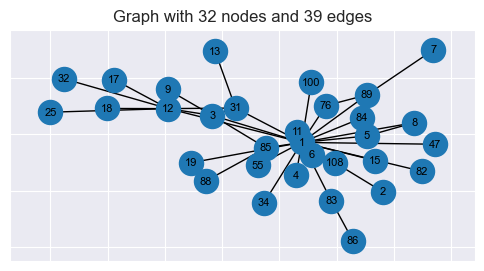

****************************************************************************************
Graph for phase: 6


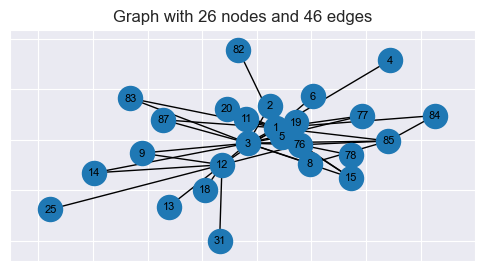

****************************************************************************************
Graph for phase: 7


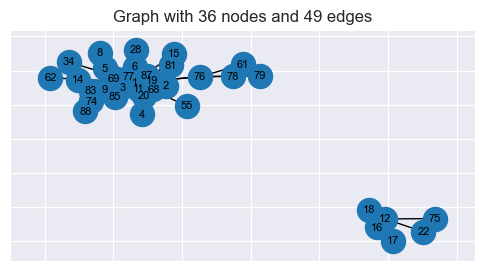

****************************************************************************************
Graph for phase: 8


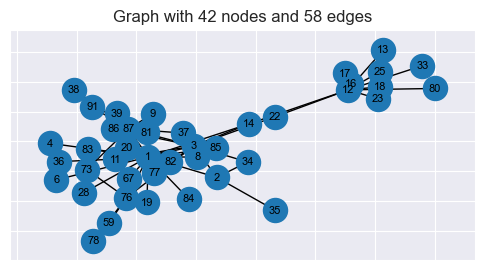

****************************************************************************************
Graph for phase: 9


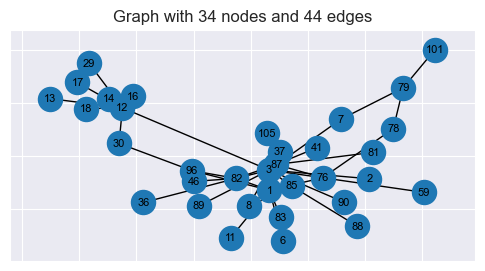

****************************************************************************************
Graph for phase: 10


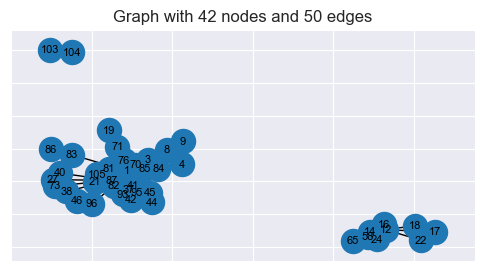

****************************************************************************************
Graph for phase: 11


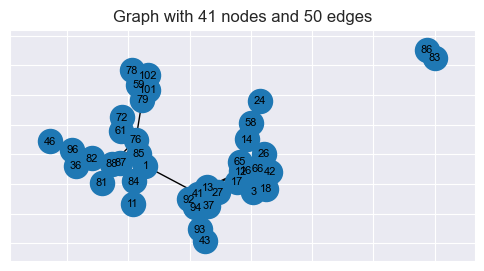

In [11]:
for i, g in enumerate(graphs):
    print("****************************************************************************************")
    print("Graph for phase:", i + 1)
    
    plt.figure(figsize=(6,3))
    # nx.draw(g, with_labels = True)   
    nx.draw_networkx(g, with_labels = True, font_size=8)  
    plt.title(str(g))
    plt.show()

## **Centrality Measures** 

Let us now explore the various centrality measures for the above graphs.

In [12]:
# Let's declare a function to get subject associated with the data generated
def get_subject_df(cc):
    """Return a df based on the data dictionary provided.
    cc: dict, with key as subject id, and values as measure."""
    pprint(sorted(cc.items(), key=lambda x: x[1], reverse=True))
    print('')
    df = pd.DataFrame(data={'subject': [subject.get(s,'') for s in cc.keys()],
                        'centrality': cc.values()
                        }, index=cc.keys())
    return df.sort_values('centrality', ascending=False)

### **a. Degree Centrality**

- Let us now calculate the degree centrality.
- High degree centrality: most popular person.

In [13]:
# Let us store the degree centralities for each node of a graph in a dictionary
# High degree centrality: most popular person
deg_cen = {}

for g in graphs:
    deg_cen[g] = nx.degree_centrality(g)
    
# # Let us look at the deg_cen dictionary for the first graph
# deg_cen[graphs[0]]

In [14]:
# For the first phase
df = get_subject_df(deg_cen[graphs[0]])

print('Most popular subject:', df.loc[df['centrality'].idxmax()]['subject'])
df.head(3)

[(1, 0.8571428571428571),
 (88, 0.2857142857142857),
 (85, 0.21428571428571427),
 (6, 0.21428571428571427),
 (83, 0.14285714285714285),
 (3, 0.14285714285714285),
 (89, 0.14285714285714285),
 (5, 0.07142857142857142),
 (90, 0.07142857142857142),
 (4, 0.07142857142857142),
 (8, 0.07142857142857142),
 (64, 0.07142857142857142),
 (54, 0.07142857142857142),
 (7, 0.07142857142857142),
 (2, 0.07142857142857142)]

Most popular subject: Daniel Serero (N1) - Mastermind of the network


,subject,centrality
1,Daniel Serero (N1) - Mastermind of the network,0.8571
88,Lee Gilbert (N88) - Trusted man of Wallace Lee (became an informer after the arrest),0.2857
85,Wallace Lee (N85) - Takes care of financial affairs (accountant),0.2143


### **b. Eigenvector**

- High eigenvector centrality: most popular person that is friends with popular people.

In [15]:
# Similarily, we can generate other centrality measures
# High eigenvector centrality: most popular person that is friends with popular people

# Eigenvector Centrality
eig_cen = {}

for g in graphs:
    eig_cen[g] = nx.eigenvector_centrality(g)
    
# # Let us look at the eig_cen dictionary for the first graph
# eig_cen[graphs[0]]

In [16]:
# For the first phase
df = get_subject_df(eig_cen[graphs[0]])

print('Most popular subject that is friends with popular people:', 
      df.loc[df['centrality'].idxmax()]['subject'])
df.head(3)

[(1, 0.6264507675831663),
 (88, 0.3644366304008633),
 (85, 0.3126697642394336),
 (3, 0.25384164637641143),
 (6, 0.22964047742943403),
 (83, 0.21930984301223194),
 (89, 0.171753381279065),
 (5, 0.16048172514920975),
 (90, 0.16048172514920975),
 (4, 0.16048172514920975),
 (8, 0.16048172514920975),
 (64, 0.16048172514920975),
 (54, 0.16048172514920975),
 (2, 0.16048172514920975),
 (7, 0.04399939166591517)]

Most popular subject that is friends with popular people: Daniel Serero (N1) - Mastermind of the network


,subject,centrality
1,Daniel Serero (N1) - Mastermind of the network,0.6265
88,Lee Gilbert (N88) - Trusted man of Wallace Lee (became an informer after the arrest),0.3644
85,Wallace Lee (N85) - Takes care of financial affairs (accountant),0.3127


### **c. Betweenness**

- High betweenness centrality: person whose removal could best break the network apart

In [17]:
# Similarily, we can generate other centrality measures
# high betweenness centrality: person whose removal could best break the network apart

# Betweenness Centrality
betw_cen = {}

for g in graphs:
    betw_cen[g] = nx.betweenness_centrality(g)

# # Let us look at the betw_cen dictionary for the first graph
# betw_cen[graphs[0]]

In [18]:
# For the first phase
df = get_subject_df(betw_cen[graphs[0]])

print('Subject that could break the network if it is removed:', 
      df.loc[df['centrality'].idxmax()]['subject'])
df.head(3)

[(1, 0.9065934065934067),
 (89, 0.14285714285714288),
 (88, 0.05311355311355313),
 (83, 0.036630036630036625),
 (85, 0.036630036630036625),
 (6, 0.01098901098901099),
 (5, 0.0),
 (3, 0.0),
 (90, 0.0),
 (4, 0.0),
 (8, 0.0),
 (64, 0.0),
 (54, 0.0),
 (7, 0.0),
 (2, 0.0)]

Subject that could break the network if it is removed: Daniel Serero (N1) - Mastermind of the network


,subject,centrality
1,Daniel Serero (N1) - Mastermind of the network,0.9066
89,Antonio Iannacci (N89) - Investor,0.1429
88,Lee Gilbert (N88) - Trusted man of Wallace Lee (became an informer after the arrest),0.0531


### **d. Closeness Centrality measures**

- High closeness centrality: person that could best inform the group

In [19]:
# Similarily, we can generate other centrality measures
# High closeness centrality: person that could best inform the group

# Closeness Centrality
clo_cen = {}

for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

    # # Let us look at the clo_cen dictionary for the first graph
# clo_cen[graphs[0]]

In [20]:
# For the first phase
df = get_subject_df(clo_cen[graphs[0]])

print('Subject that could best inform the group: ', 
      df.loc[df['centrality'].idxmax()]['subject'])
df.head(3)

[(1, 0.875),
 (88, 0.56),
 (85, 0.5384615384615384),
 (83, 0.5185185185185185),
 (3, 0.5185185185185185),
 (89, 0.5185185185185185),
 (5, 0.4827586206896552),
 (90, 0.4827586206896552),
 (4, 0.4827586206896552),
 (8, 0.4827586206896552),
 (64, 0.4827586206896552),
 (54, 0.4827586206896552),
 (2, 0.4827586206896552),
 (6, 0.4),
 (7, 0.35)]

Subject that could best inform the group:  Daniel Serero (N1) - Mastermind of the network


,subject,centrality
1,Daniel Serero (N1) - Mastermind of the network,0.8750
88,Lee Gilbert (N88) - Trusted man of Wallace Lee (became an informer after the arrest),0.5600
85,Wallace Lee (N85) - Takes care of financial affairs (accountant),0.5385


**Observations:**

- We have now created the dictionaries with the centrality measures
- The dictionaries are deg_cen, eig_cen, betw_cen, and clo_cen.
- We can sort the dictionaries, in descending order, to obtain the nodes that are the most important.

In [21]:
# Let us now sort the degree centrality measure and identify the important nodes
# Degree centrality: most popular person

for ix, g in enumerate(graphs):
    temp_dict = {}
    for w in sorted(deg_cen[g], key = deg_cen[g].get, reverse = True):
        temp_dict[w] = deg_cen[g][w]
    # print("Sorted importance of nodes in terms of deg_cen for Phase {:>2} is {}".format(
    #     ix + 1, list(temp_dict.keys())[:5]))
    print("Most popular person Top 5 for Phase {:>2} is {}".format(
        ix + 1, list(temp_dict.keys())[:5]))

Most popular person Top 5 for Phase  1 is [1, 88, 85, 6, 83]
Most popular person Top 5 for Phase  2 is [1, 3, 88, 89, 8]
Most popular person Top 5 for Phase  3 is [1, 3, 83, 49, 9]
Most popular person Top 5 for Phase  4 is [1, 83, 3, 89, 85]
Most popular person Top 5 for Phase  5 is [1, 12, 3, 31, 89]
Most popular person Top 5 for Phase  6 is [1, 3, 12, 76, 85]
Most popular person Top 5 for Phase  7 is [1, 3, 12, 76, 19]
Most popular person Top 5 for Phase  8 is [1, 3, 12, 87, 76]
Most popular person Top 5 for Phase  9 is [3, 1, 12, 87, 82]
Most popular person Top 5 for Phase 10 is [1, 87, 37, 12, 82]
Most popular person Top 5 for Phase 11 is [12, 41, 76, 1, 79]


- We generated the degree centrality based top 5 most important nodes in each phase.
- We can go ahead and repeat the same exercise for other centrality measures.

In [22]:
# Eigenvector centrality: most popular person that is friends with popular people

for ix, g in enumerate(graphs):
    cc = eig_cen[g]
    print(f"Most popular with popular friends Top 5 for Phase {ix + 1:>2} is ",
          [w for w in sorted(cc, key=cc.get, reverse=True)][:5]) 

Most popular with popular friends Top 5 for Phase  1 is  [1, 88, 85, 3, 6]
Most popular with popular friends Top 5 for Phase  2 is  [1, 3, 8, 64, 10]
Most popular with popular friends Top 5 for Phase  3 is  [1, 3, 83, 49, 84]
Most popular with popular friends Top 5 for Phase  4 is  [1, 3, 83, 85, 9]
Most popular with popular friends Top 5 for Phase  5 is  [1, 12, 3, 31, 85]
Most popular with popular friends Top 5 for Phase  6 is  [1, 3, 76, 12, 85]
Most popular with popular friends Top 5 for Phase  7 is  [1, 3, 19, 77, 83]
Most popular with popular friends Top 5 for Phase  8 is  [1, 3, 87, 76, 8]
Most popular with popular friends Top 5 for Phase  9 is  [3, 1, 87, 82, 76]
Most popular with popular friends Top 5 for Phase 10 is  [1, 87, 37, 82, 105]
Most popular with popular friends Top 5 for Phase 11 is  [12, 41, 27, 1, 13]


In [23]:
# Betweenness centrality: person whose removal could best break the network apart

for ix, g in enumerate(graphs):
    cc = betw_cen[g]
    print(f"Subject with greatest network break power if removed Top 5 for Phase {ix + 1:>2} is ",
          [w for w in sorted(cc, key=cc.get, reverse=True)][:5]) 

Subject with greatest network break power if removed Top 5 for Phase  1 is  [1, 89, 88, 83, 85]
Subject with greatest network break power if removed Top 5 for Phase  2 is  [1, 89, 83, 88, 76]
Subject with greatest network break power if removed Top 5 for Phase  3 is  [1, 3, 9, 5, 83]
Subject with greatest network break power if removed Top 5 for Phase  4 is  [1, 89, 3, 83, 8]
Subject with greatest network break power if removed Top 5 for Phase  5 is  [1, 12, 83, 89, 85]
Subject with greatest network break power if removed Top 5 for Phase  6 is  [1, 12, 3, 76, 85]
Subject with greatest network break power if removed Top 5 for Phase  7 is  [1, 76, 3, 85, 12]
Subject with greatest network break power if removed Top 5 for Phase  8 is  [1, 12, 3, 14, 87]
Subject with greatest network break power if removed Top 5 for Phase  9 is  [3, 12, 1, 87, 76]
Subject with greatest network break power if removed Top 5 for Phase 10 is  [1, 87, 37, 82, 76]
Subject with greatest network break power if remo

In [24]:
# Closeness centrality: person that could best inform the group

for ix, g in enumerate(graphs):
    cc = clo_cen[g]
    print(f"Best Network Informer/feeder Top 5 for Phase {ix + 1:>2} is ",
          [w for w in sorted(cc, key=cc.get, reverse=True)][:5]) 

Best Network Informer/feeder Top 5 for Phase  1 is  [1, 88, 85, 83, 3]
Best Network Informer/feeder Top 5 for Phase  2 is  [1, 88, 89, 3, 83]
Best Network Informer/feeder Top 5 for Phase  3 is  [1, 3, 83, 6, 49]
Best Network Informer/feeder Top 5 for Phase  4 is  [1, 83, 3, 89, 85]
Best Network Informer/feeder Top 5 for Phase  5 is  [1, 12, 3, 31, 85]
Best Network Informer/feeder Top 5 for Phase  6 is  [1, 3, 12, 76, 85]
Best Network Informer/feeder Top 5 for Phase  7 is  [1, 3, 19, 76, 85]
Best Network Informer/feeder Top 5 for Phase  8 is  [1, 3, 14, 87, 76]
Best Network Informer/feeder Top 5 for Phase  9 is  [3, 1, 87, 76, 82]
Best Network Informer/feeder Top 5 for Phase 10 is  [1, 87, 37, 82, 105]
Best Network Informer/feeder Top 5 for Phase 11 is  [41, 1, 12, 76, 87]


## **Understanding the variation of node importance across phases**

- From the above analysis, we figure out that some nodes appear to be more important than others, and we will focus our attention on analyzing those nodes.

- Let us take out Node1, Node3, and Node12 and visualize their importance across phases. We will look at the betweenness and degree centrality only. You are encouraged to try out the same for other measures.

In [25]:
# # Let us first start with node 1

# # Node 1
# node1_deg = []
# phases = []
# for ix, g in enumerate(graphs):
#     node1_deg.append(deg_cen[g][1]*100)
#     phases.append(ix + 1)

# node1_bet = []
# for ix, g in enumerate(graphs):
#     node1_bet.append(betw_cen[g][1]*100)

# # Now, let us calculate the same for node 3 and 12 as well

# # Node 3
# node3_deg = []
# for ix, g in enumerate(graphs):
#     node3_deg.append(deg_cen[g][3]*100)

# node3_bet = []
# for ix, g in enumerate(graphs):
#     node3_bet.append(betw_cen[g][3]*100)

# # Node 12
# node12_deg = []
# for ix, g in enumerate(graphs):
#     if (12 in deg_cen[g].keys()):
#         node12_deg.append(deg_cen[g][12]*100)
#     else:
#         node12_deg.append(None)

# node12_bet = []
# for ix, g in enumerate(graphs):
#     if (12 in betw_cen[g].keys()):
#         node12_bet.append(betw_cen[g][12]*100)
#     else:
#         node12_bet.append(None)

In [26]:
# # Now, let us plot the importance of nodes across phases
# # high degree centrality: most popular person

# # Ploting Degree centrality for nodes 1, 3, and 12
# plt.figure(figsize = (10, 3))
# plt.plot(phases, node1_deg, label = 'Node 1')
# plt.plot(phases, node3_deg, label = 'Node 3')
# plt.plot(phases, node12_deg, label = 'Node 12')
# plt.ylabel('Degree centrality(*100)')
# plt.xticks(phases)
# plt.xlabel('Phases')
# plt.legend()
# plt.title('Most important subject in the Criminal Network')
# plt.show()

In [27]:
# Improving the code

# Function to generate the plots
def plot_importance(cc, nodes, ylabel='', title=''):
    """Plot of the node importance/weight across phases.
    cc: dictionary of weights per node per phase.
    ylabel: Name of the centrality measure.
    title: Title of the plot"""
    
    def get_weights(n):
        return [cc[g][n]*100 if n in cc[g].keys() else None for g in graphs]

    nodes_data = {n: get_weights(n) for n in nodes}
    x_ticks = range(len(graphs))
    
    # Ploting centrality measure for nodes list.
    plt.figure(figsize = (10, 3))
    for n in nodes_data:
        plt.plot(x_ticks, nodes_data[n], label=f'Node {n}')
    plt.ylabel(ylabel)
    plt.xticks(x_ticks)
    plt.xlabel('Phases')
    plt.legend()
    plt.title(title)
    plt.show()

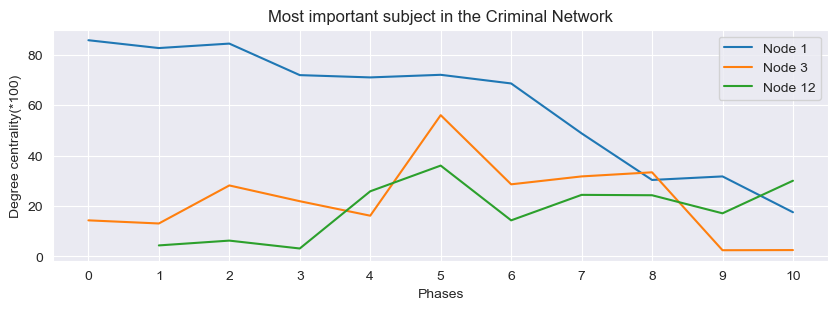

In [28]:
# high degree centrality: most popular person
nodes = [1, 3, 12]

# Ploting Degree centrality for nodes 1, 3, and 12
plot_importance(deg_cen, nodes, 
                'Degree centrality(*100)',
                'Most important subject in the Criminal Network')

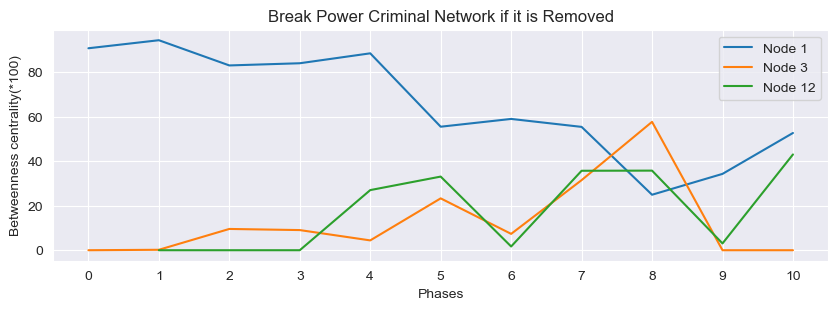

In [29]:
# high betweenness centrality: person whose removal could best break the network apart

# Nodes 1, 3, and 12
plot_importance(betw_cen, nodes, 
                'Betweenness centrality(*100)',
                'Break Power Criminal Network if it is Removed')

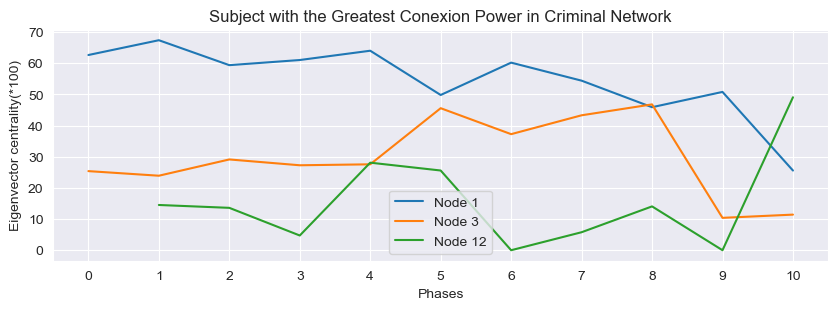

In [30]:
# high eigenvector centrality: most popular person that is friends with popular people

# Nodes 1, 3, and 12
plot_importance(eig_cen, nodes, 
                'Eigenvector centrality(*100)',
                'Subject with the Greatest Conexion Power in Criminal Network')

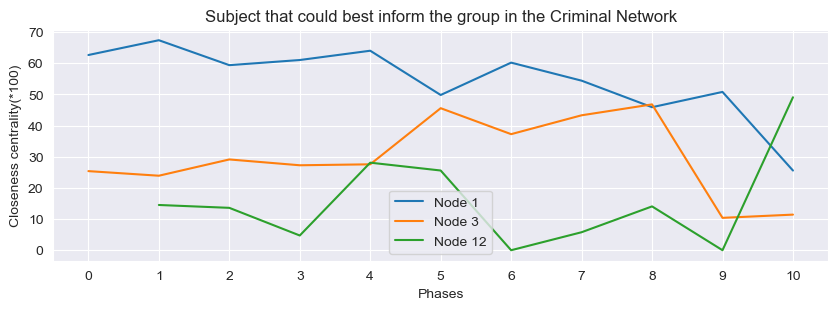

In [31]:
# high closeness centrality: person that could best inform the group

# Nodes 1, 3, and 12
plot_importance(eig_cen, nodes, 
                'Closeness centrality(*100)',
                'Subject that could best inform the group in the Criminal Network')

## **Conclusion:**

- We carried out the analysis on the network and figured out techniques to read adjacency matrices into graphs.
- We later visualized the graphs, created centrality measures, and identified the important nodes - N1 (Daniel Serero), N3 (Pierre Perlini), N12 (Ernesto Morales).
- We studied and plotted the variation in the centrality of the important nodes across phases in a bid to understand the affect of disruption in the network.

## **Bonus: We can highlight the important nodes in graphs**

- Let's have a look at the phase 2 graph: graph2

In [32]:
# graph2 = nx.from_pandas_adjacency(P2)
# color = []
# for node in graph2:
#     if (node == 1 or node == 12  or node == 3):
#         color.append('red')
#     else:
#         color.append('green')

# ax = plt.subplot(131)
# nx.draw_spring(graph2, node_color=color, with_labels = True, ax=ax)

In [33]:
# Improving the code
def plot_network(df, nodes, title):
    """Plotting the network from df, highlighting the nodes defined.
    df: dataframe with the network details.
    nodes: list of nodes to highlight
    title: title of the plot
    """
    net = nx.from_pandas_adjacency(df)
    color = ['red' if n in nodes else 'green' for n in net]
    
    plt.figure(figsize=(10,3))
    ax = plt.subplot(111)
    nx.draw_spring(net, node_color=color, with_labels=True, font_size=8, ax=ax)
    plt.title(title)
    plt.show()

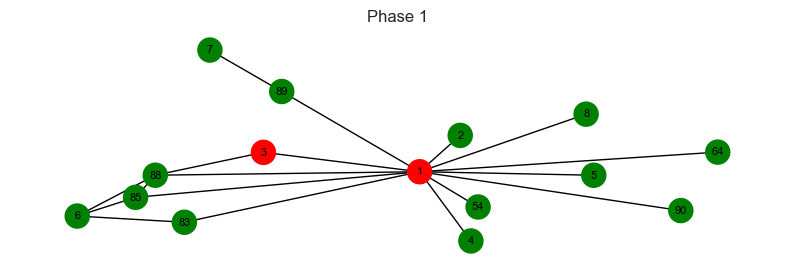

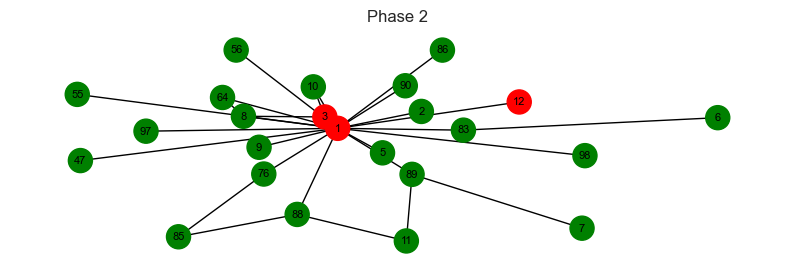

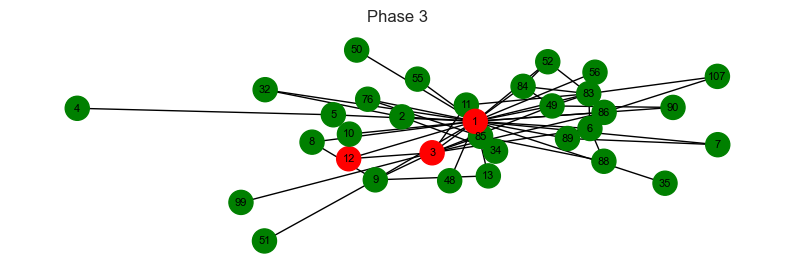

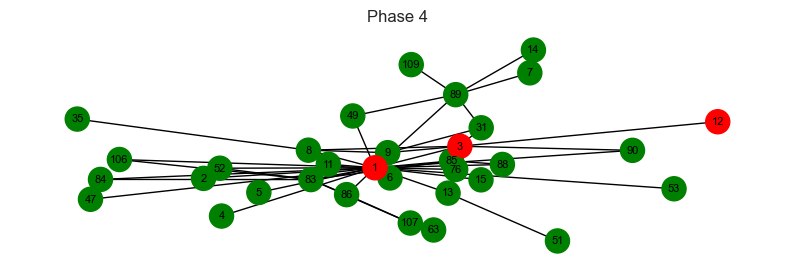

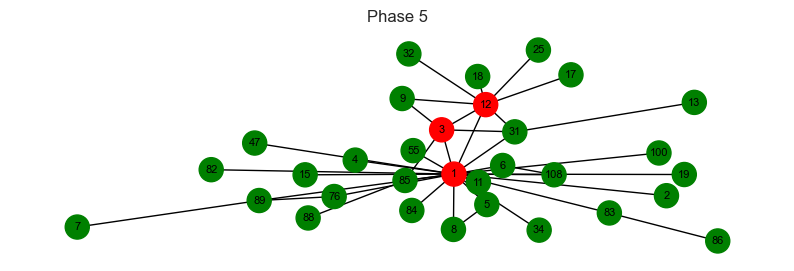

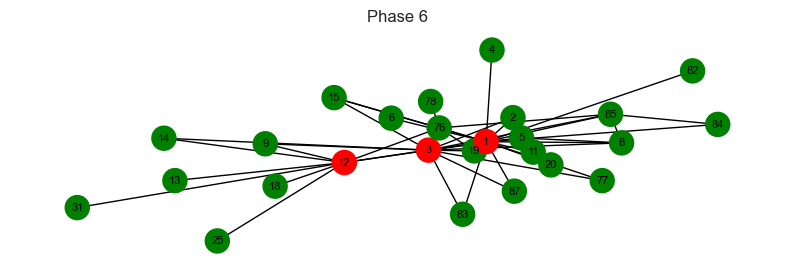

In [34]:
# Highlighting the nodes in each phase
nodes = [1, 3, 12]

for i, df in enumerate([P1, P2, P3, P4, P5, P6]):
    plot_network(df, nodes, f'Phase {i+1}')

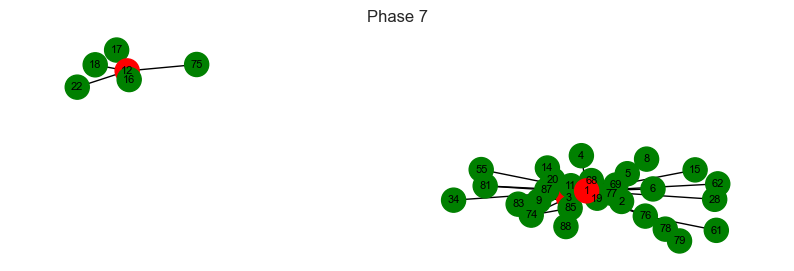

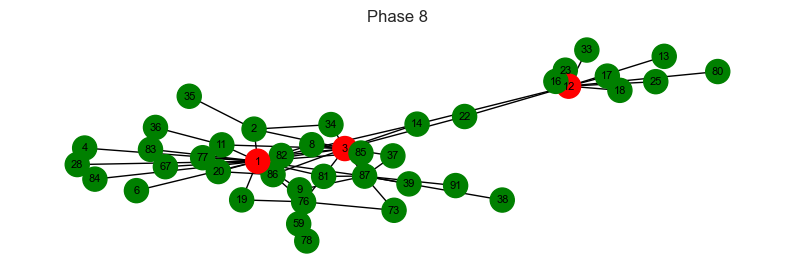

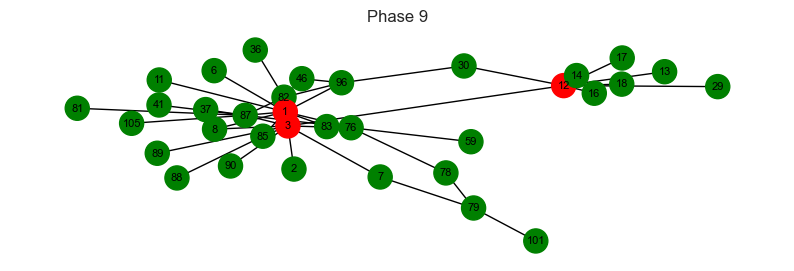

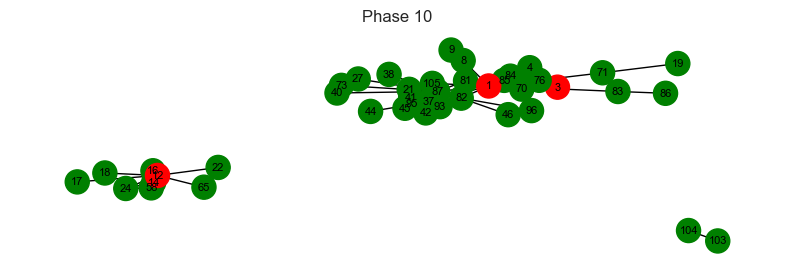

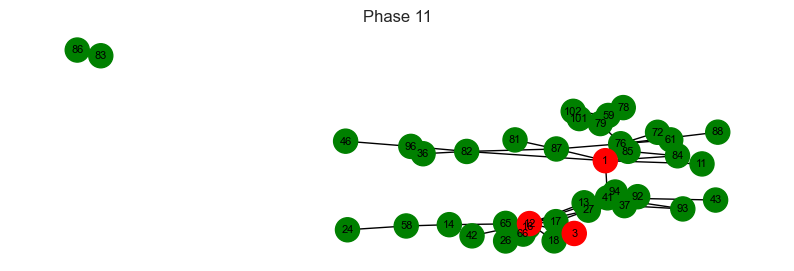

In [35]:
# Highlighting the nodes in each phase (second part)
for i, df in enumerate([P7, P8, P9, P10, P11]):
    plot_network(df, nodes, f'Phase {i+7}')

- The important nodes, i.e., nodes 1, 3, and 12 have been marked as red.

---------------